# **Classification vs Clustering: an example on malignant comments**
Cervini Stella\
Sabino Giuseppe

**IMPORTANT NOTE**\
In order for the project to run smoothly, you need to put the following folder in your Drive: https://drive.google.com/drive/folders/1dgrU_c21bxDypvkpF6EPZ0QazCKXGDXJ?usp=sharing

## **Pakages Install**

In [ ]:
pip install transformers

In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=8be6c5236ae6a8df26b7368d2001d60a3e3f957ae70d5fff1350f46694868219
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## **Pakages import**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
from google.colab import drive
import pandas as pd
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec
from tensorflow.keras.utils import plot_model
import random
import os
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from nltk.probability import FreqDist
from sklearn.cluster import KMeans
from sklearn.metrics import (rand_score, adjusted_mutual_info_score,
                             homogeneity_score, completeness_score,
                             v_measure_score, fowlkes_mallows_score)
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import skfuzzy as fuzz
import sklearn
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Data import**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/TM&S_Cervini_Sabino/train.csv'
df = pd.read_csv(csv_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/TM&S_Cervini_Sabino/train.csv'

In [ ]:
csv_path_test = '/content/drive/MyDrive/TM&S_Cervini_Sabino/test.csv'
df_test = pd.read_csv(csv_path_test)

In [ ]:
weight_path = '/content/drive/MyDrive/TM&S_Cervini_Sabino/finetune.h5'

In [ ]:
csv_path_prediction_val = ('/content/drive/MyDrive/TM&S_Cervini_Sabino/predicted_probabilities.csv')
df_prediction_val=pd.read_csv(csv_path_prediction_val)

In [ ]:
csv_path_prediction_test = ('/content/drive/MyDrive/TM&S_Cervini_Sabino/predicted_probabilities_test.csv')
df_prediction_test=pd.read_csv(csv_path_prediction_test)

In [ ]:
df_tsne_results_train = pd.read_csv("/content/drive/MyDrive/TM&S_Cervini_Sabino/df_tsne_results_train.csv")
df_tsne_results_test = pd.read_csv("/content/drive/MyDrive/TM&S_Cervini_Sabino/df_tsne_results_test.csv")

## **Data Understanding & Exploration**

*Data Source*: https://www.kaggle.com/datasets/surekharamireddy/malignant-comment-classification?select=train.csv

**Data Description**

---



The data set contains the training set, which has **159.571 samples with no missing vaues**. All the data samples contain `8 fields` which includes `Id`, `Comments`, `Malignant`, `Highly malignant`, `Rude`, `Threat`, `Abuse` and `Loathe`.
The label can be **either 0 or 1**, where 0 denotes a NO while 1 denotes a YES. There are **various comments which have multiple labels**. The first attribute is a unique ID associated with each comment.

The data set includes:

- **ID**: it includes unique Ids associated with each comment text given.
- **Comment text**: this column contains the comments extracted from various social media platforms.
- **Malignant**: it is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
-**Highly Malignant**: it denotes comments that are highly malignant and hurtful.
-**Rude**: it denotes comments that are very rude and offensive.
-**Threat**: it contains indication of the comments that are giving any threat to someone.
-**Abuse**: it is for comments that are abusive in nature.
-**Loathe**: it describes the comments which are hateful and loathing in nature.

In [ ]:
df.head(7)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0  
5          0                 0     0       0      0       0  
6          1                 1     1       0      1       0

In [ ]:
# ckeck for duplicates
df.duplicated().value_counts()

False    159571
dtype: int64

In [ ]:
# defining numerical columns of interest
target_cols = ['malignant', 'highly_malignant',	'rude',	'threat',	'abuse',	'loathe']

In [ ]:
# check data dimesionality
df.shape

(159571, 8)

In [ ]:
# check if there are any missing values
df.isnull().values.any()

False

**Multi label comments**

---



In [ ]:
# number of comments with more than one label
multi_label = df.loc[:, target_cols].sum(axis = 1, numeric_only=True).to_frame()
print(f'There are {multi_label[multi_label[0] > 1].shape[0]} comments with more than one label!')

There are 9865 comments with more than one label!


In [ ]:
# get comments with more that one label
multi_label_text = df.iloc[list(multi_label[multi_label[0] > 1].index)]
multi_label_text.head(6)

id                                       comment_text  \
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
42  001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43  00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
51  001dc38a83d420cf  GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...   
55  0020e7119b96eeeb  Stupid peace of shit stop deleting my stuff as...   
56  0020fd96ed3b8c8b  =Tony Sidaway is obviously a fistfuckee. He lo...   

    malignant  highly_malignant  rude  threat  abuse  loathe  
6           1                 1     1       0      1       0  
42          1                 0     1       0      1       1  
43          1                 0     1       0      1       0  
51          1                 0     1       0      0       0  
55          1                 1     1       0      1       0  
56          1                 0     1       0      1       0

**Class imbalance & Correlation**

---



To further elaborate, this histogram serves as a visual representation of the various factors contributing to comment toxicity across the six specified columns. Each column likely corresponds to a distinct aspect. The separation between toxic and non-toxic comments is graphically emphasized, providing a clear comparison to note if is present class imbalance.

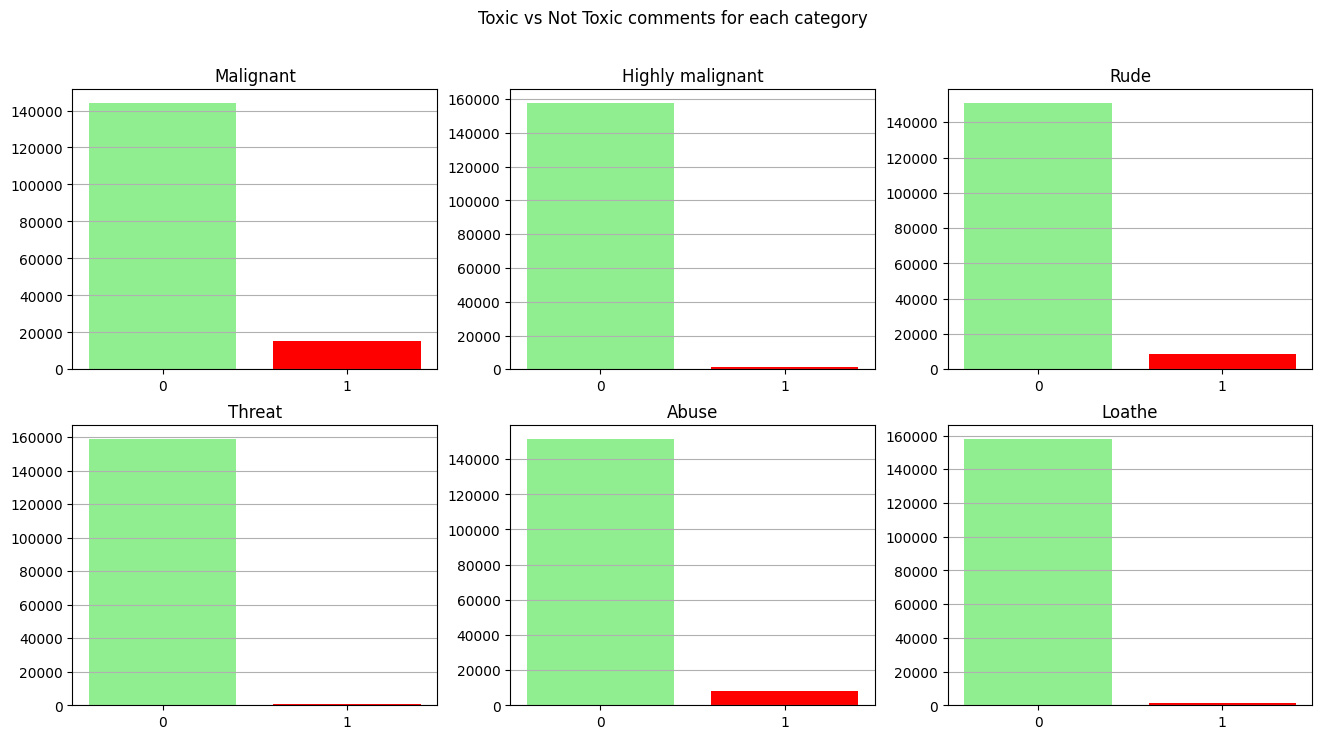

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Toxic vs Not Toxic comments for each category')
axis[0,0].bar('0', df[df.malignant == 0].count(), color = 'lightgreen')
axis[0,0].bar('1', df[df.malignant == 1].count(), color = 'red')
axis[0,0].set_title('Malignant')
axis[0,0].grid(axis = 'y')
axis[0,1].bar('0', df[df.highly_malignant == 0].count(), color = 'lightgreen')
axis[0,1].bar('1', df[df.highly_malignant == 1].count(), color = 'red')
axis[0,1].set_title('Highly malignant')
axis[0,1].grid(axis = 'y')
axis[0,2].bar('0', df[df.rude == 0].count(), color = 'lightgreen')
axis[0,2].bar('1', df[df.rude == 1].count(), color = 'red')
axis[0,2].set_title('Rude')
axis[0,2].grid(axis = 'y')
axis[1,0].bar('0', df[df.threat == 0].count(), color = 'lightgreen')
axis[1,0].bar('1', df[df.threat == 1].count(), color = 'red')
axis[1,0].set_title('Threat')
axis[1,0].grid(axis = 'y')
axis[1,1].bar('0', df[df.abuse == 0].count(), color = 'lightgreen')
axis[1,1].bar('1', df[df.abuse == 1].count(), color = 'red')
axis[1,1].set_title('Abuse')
axis[1,1].grid(axis = 'y')
axis[1,2].bar('0', df[df.loathe == 0].count(), color = 'lightgreen')
axis[1,2].bar('1', df[df.loathe == 1].count(), color = 'red')
axis[1,2].set_title('Loathe')
axis[1,2].grid(axis = 'y')
plt.show()

In [ ]:
y1=[]
for column in target_cols:
    value_counts = df[column].value_counts()
    y1.append(value_counts[1])

total = np.sum(y1)
y1_percentages = [round((value / total), 3) for value in y1]
df['Toxicity'] = df[target_cols].apply(lambda row: 1 if row.any() else 0, axis=1)

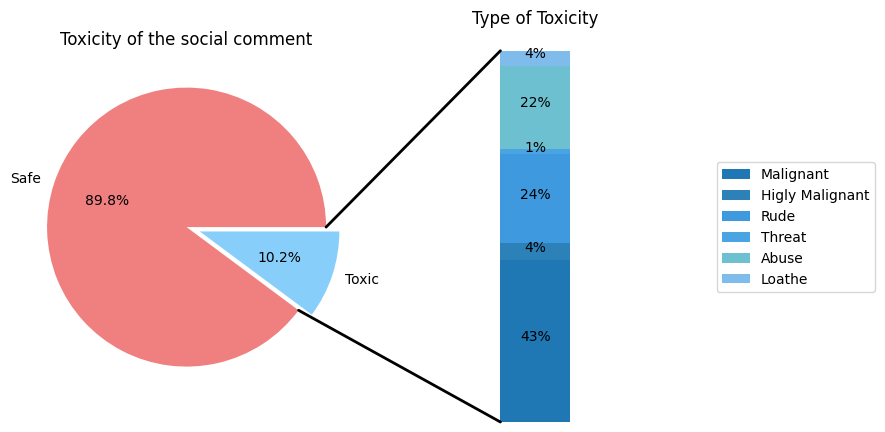

In [ ]:
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

ratios = [df['Toxicity'].value_counts()[0],df['Toxicity'].value_counts()[1]]
labels = ['Safe', 'Toxic']
explode = [0, 0.1]

angle = -180 * ratios[0]
ax1.set_title('Toxicity of the social comment')

ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode,colors=['lightcoral', 'lightskyblue'])

xpos = 0
bottom = 0
width = .2
colors = [
    [0.12156863, 0.46666667, 0.70588235],
    [0.17254902, 0.50980392, 0.72156863],
    [0.24313725, 0.6, 0.87058824],
    [0.29019608, 0.63921569, 0.89019608],
    [0.42745098, 0.75294118, 0.81176471],
    [0.49803922, 0.7372549, 0.9254902]
]
#colors=['#1f77b4','#d62728','#2ca02c','#9467bd', '#ff7f0e','#17becf']

for j in range(len(y1_percentages)):
    height = y1_percentages[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Type of Toxicity')
ax2.legend(('Malignant', 'Higly Malignant', 'Rude', 'Threat', 'Abuse', 'Loathe'),loc='center left', bbox_to_anchor=(1, 0.5))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = np.sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

In this dataset, a significant **class imbalance** is present; indeed, **messages with something negative are notably fewer**. A representation is provided where AT LEAST one negative class is set to 1.\
The following **correlation matrix** reveals associations between various categories of toxicity in the dataset. Notably, there are strong positive correlations between `rude` and `abuse` (0.74), as well as `Toxicity` and `rude` (0.70). The `highly_malignant` category shows moderate positive correlations with `rude` (0.403) and `abuse` (0.376). It is noteworthy that none of the variable pairs exhibit a negative correlation.

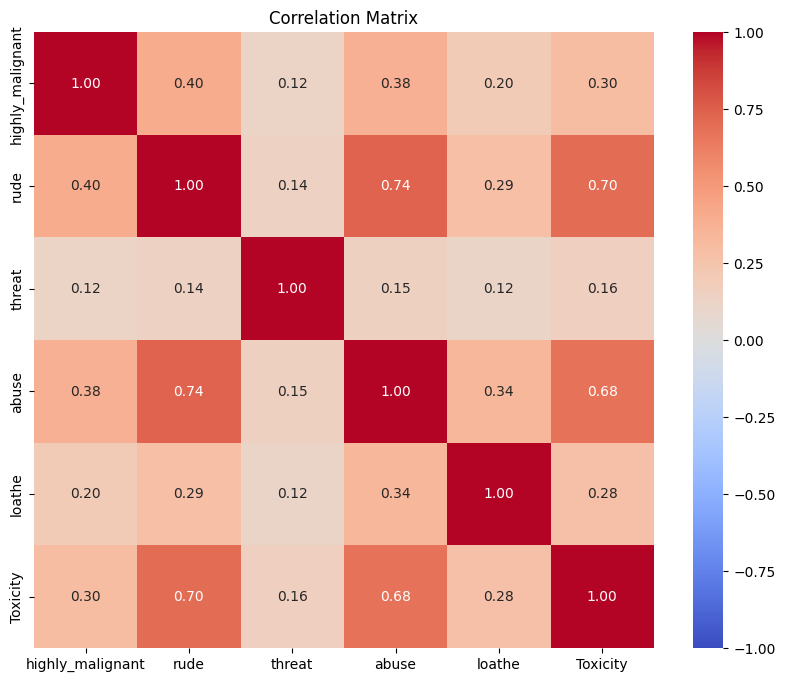

In [ ]:
correlation_matrix = df.iloc[:, -6:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Text preprocessing**

Most important phases:

- **Remove special characters**: identify any character in the text that does not belong to the set of letters, numbers, or spaces. Subsequently, these non-alphanumeric characters are replaced with an empty string, effectively cleaning the text.

- **Stopword Removal**: stopword removal is a filtering process that involves eliminating common and less meaningful words, such as "is," "that," and "and," from a text. This enhances the focus on key words, improving the quality of textual analysis.

- **Text Normalization**:
  text normalization involves standardizing words by converting them to lowercase and removing special characters. This ensures a consistent representation, simplifying linguistic and text analyses by providing a uniform basis for comparison and processing.

- **Tokenization**:
  tokenization is the process of breaking down a text into individual units, called tokens. These tokens are typically words or subwords, enabling more granular analysis in natural language processing.

- **Lemmatization**:
  lemmatization is a normalization method that involves reducing words to their base or dictionary form, known as a lemma. It ensures that different inflections and variations of a word are transformed to a common, canonical form, facilitating more precise language analysis and understanding in natural language processing tasks.

### **Functions definition**

In [ ]:
def remove_special_characters(text):
    #cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #return cleaned_text
    pattern = re.compile('[^A-Za-z0-9]+')

    # Remove special characters from each token
    filtered_text = [re.sub(pattern, '', token) for token in text]

    return filtered_text


In [ ]:
def remove_stopwords(text):
    # return ' '.join([word for word in text.split() if word not in stop]) ho docuto cambiare la funzione perchè facciamo prima toenization --> non sono più stringhe
    filtered_text = [word for word in text if word not in stop]
    return filtered_text

In [ ]:
def lemmaSentence(token_words):
    lemma_text=[]
    for word in token_words:
        lemma_text.append(wordnet_lemmatizer.lemmatize(word))
    return lemma_text

In [ ]:
def remove_urls(text):
    return url_pattern.sub('', text)

In [ ]:
def remove_long(texts):
    texts = [t for t in texts if len(t) < 20]
    return texts


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))

In [ ]:
def remove_empty_tokens(token_list):
    # Use a list comprehension to filter out empty tokens
    non_empty_tokens = [token for token in token_list if token]

    return non_empty_tokens

### **Pre-processing**

In [ ]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['text_preprocessed'] = df['comment_text'].apply(remove_urls)
df['text_preprocessed'] = df['text_preprocessed'].str.replace('\n',' ')
df["text_preprocessed"] = df["text_preprocessed"].str.lower()
df["text_preprocessed"] = df["text_preprocessed"].str.strip()
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: word_tokenize(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: remove_stopwords(x))
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_special_characters(x))
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_long(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: lemmaSentence(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: remove_empty_tokens(x))

In [ ]:
print(df['text_preprocessed'])

0         [explanation, edits, made, username, hardcore,...
1         [daww, match, background, colour, m, seemingly...
2         [hey, man, m, really, trying, edit, war, s, gu...
3         [ca, nt, make, real, suggestion, improvement, ...
4                    [sir, hero, chance, remember, page, s]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, there, actual, article, prostit...
159569    [look, like, actually, put, speedy, first, ver...
159570    [really, nt, think, understand, came, idea, ba...
Name: text_preprocessed, Length: 159571, dtype: object


Now you can visually see the difference in length between the **original text** and the text obtained after a **preprocessing** phase, taking into account string normalization. Subsequently, the fifty most frequently used **words** in **toxic comments** are presented. This additional step aims to provide a detailed analysis of key words associated with comments deemed toxic. Identifying these words can be beneficial in gaining a better understanding of prevalent themes and language in online communication contexts considered negative

### **Exploration**

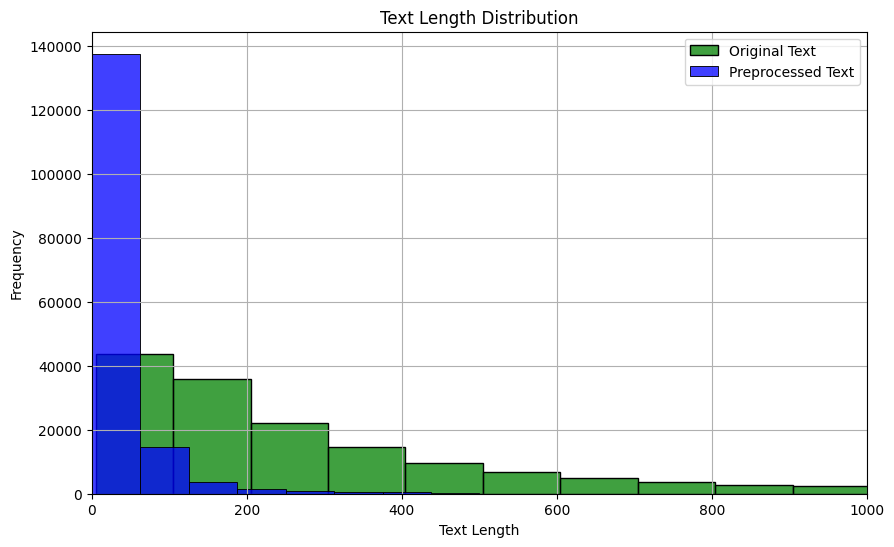

In [ ]:
df['length_preprocessed'] = df['text_preprocessed'].str.len()
df['length'] = df['comment_text'].str.len()
plt.figure(figsize=(10, 6))

sns.histplot(df['length'], bins=50, color='green', label='Original Text')
sns.histplot(df['length_preprocessed'], bins=20, color='blue', label='Preprocessed Text')

plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0,1000)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# from 0 to 6: sum of the labels for each row
df['toxic'] = multi_label[0]


In [ ]:
image = np.array(Image.open("/content/drive/MyDrive/TM&S_Cervini_Sabino/toxic_img.png"))

In [ ]:
#df['Offensive_text'] = df['comment_text'].str.replace("NIGGER","NIxGER").str.replace("UCK","xCK").str.replace("DICK","DxCK").str.replace("uck","xck").str.replace("shit","sxit").str.replace("bitch","bixch").str.replace("cock","cxck")

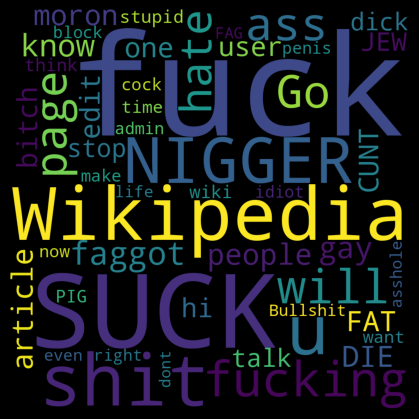

In [ ]:
bad_words = df['comment_text'][df['toxic'] >= 1]
spam_cloud = WordCloud(width=600, height=400, background_color='black', max_words=50, collocations=False,mask=image).generate(' '.join(bad_words))
plt.figure(figsize=(6,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

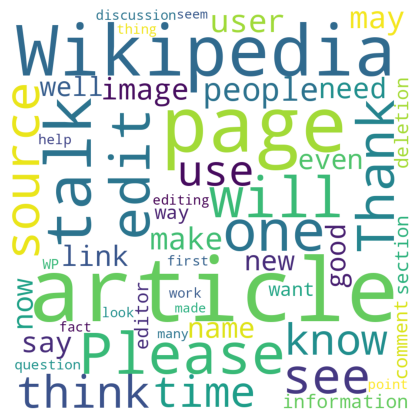

In [ ]:
good_words = df['comment_text'][df['toxic'] == 0]
spam_cloud = WordCloud(width=600, height=400, background_color='white', max_words=50, collocations=False,mask=image).generate(' '.join(good_words))
plt.figure(figsize=(6,4),facecolor='w')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Classification**

## **Model selection**

In this phase, a thorough evaluation of different models will be conducted to select the one demonstrating superior Recall for the final test. Various models will be explored to understand which one best fits the given data. The objective is to identify a model showcasing the best predictive capability on the validation dataset to ensure an accurate model during the testing phase. This approach aims to maximize the model's effectiveness in generalizing and adapting to the specific data characteristics of the problem at hand.

In the current phase, the use of four models is planned: logistic regression, random forest, XGBoost (xgb), and Adaboost (ada). This diverse model selection aims to cover various approaches and characteristics of each algorithm.

Regarding the issue of imbalanced datasets, the use of ensemble learning techniques, such as Random Forest, XGBoost, and Adaboost, is particularly advantageous. Ensemble algorithms are well-known for their ability to effectively handle imbalanced datasets.

For each of these models, a phase of searching for the best parameters is conducted using grid search CV (Cross-Validation). This process involves systematically exploring various combinations of hyperparameters through a predefined grid and evaluating the model's performance using a cross-validation procedure.

*Note*: the code used for tha grid search CV (Cross-Validation) takes a lot of time. It is still available but commented. The best parameters are inserted manually in the model definition.

In [ ]:
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: ' '.join(x))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df['text_preprocessed'], df['Toxicity'], test_size=0.2, random_state=10)

tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')
X_train = tf_vec.fit_transform(X_train)
X_val = tf_vec.transform(X_val)

print('X shape', X_train.shape,X_val.shape)
print('y shape', y_train.shape,y_val.shape)

X shape (127656, 15000) (31915, 15000)
y shape (127656,) (31915,)


**Logistic Regression**

In [ ]:
# logistic_model = LogisticRegression()

# param_grid_logistic = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'max_iter': [100, 200, 300],
#     'class_weight': [None, 'balanced'],
#     'solver': ['liblinear', 'saga']
# }

# random_search_logistic = RandomizedSearchCV(logistic_model, param_distributions=param_grid_logistic, n_iter=5, scoring='recall', cv=5, n_jobs=-1)
# random_search_logistic.fit(X_train, y_train)
# print("Migliori parametri:", random_search_logistic.best_params_)

Migliori parametri: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'class_weight': 'balanced', 'C': 10}


In [ ]:
LG = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 300, class_weight = 'balanced', C = 0.1)
LG.fit(X_train, y_train)

y_pred_train = LG.predict(X_train)
y_pred_val = LG.predict(X_val)
prob_lg=LG.predict_proba(X_val)[:, 1]
print('Training accuracy is {}'.format(round(accuracy_score(y_train, y_pred_train),3)))
print('Test accuracy is {}'.format(round(accuracy_score(y_val,y_pred_val),3)))
print('Confusion Matrix\n', confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

Training accuracy is 0.935
Test accuracy is 0.934
Confusion Matrix
 [[27144  1590]
 [  523  2658]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     28734
           1       0.63      0.84      0.72      3181

    accuracy                           0.93     31915
   macro avg       0.80      0.89      0.84     31915
weighted avg       0.95      0.93      0.94     31915



**Random Forest**

In [ ]:
# rf_model = RandomForestClassifier()


# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced'],
# }

# random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=5, scoring='recall', cv=5, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print("Migliori parametri:", random_search.best_params_)

In [ ]:
RF = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 10, class_weight= 'balanced', bootstrap= True)
RF.fit(X_train, y_train)
y_pred_train = RF.predict(X_train)
y_pred_val = RF.predict(X_val)
prob_rf=RF.predict_proba(X_val)[:, 1]
print('Training accuracy is {}'.format(round(accuracy_score(y_train, y_pred_train),3)))
print('Test accuracy is {}'.format(round(accuracy_score(y_val,y_pred_val),3)))
print('Confusion Matrix\n', confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

Training accuracy is 0.777
Test accuracy is 0.77
Confusion Matrix
 [[21901  6833]
 [  515  2666]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     28734
           1       0.28      0.84      0.42      3181

    accuracy                           0.77     31915
   macro avg       0.63      0.80      0.64     31915
weighted avg       0.91      0.77      0.81     31915



**XGB**

In [ ]:
# xgb_model = xgboost.XGBClassifier()
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=5, scoring='recall', cv=5, verbose=2, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print("Parametri ottimali:", random_search.best_params_)

In [ ]:
xgb = xgboost.XGBClassifier(subsample= 1.0, n_estimators= 200, max_depth= 4, learning_rate= 0.2, colsample_bytree= 0.9)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_val = xgb.predict(X_val)
prob_xgb=xgb.predict_proba(X_val)[:, 1]
print('Training accuracy is {}'.format(round(accuracy_score(y_train, y_pred_train),3)))
print('Test accuracy is {}'.format(round(accuracy_score(y_val,y_pred_val),3)))
print('Confusion Matrix\n', confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))




Training accuracy is 0.957
Test accuracy is 0.953
Confusion Matrix
 [[28578   156]
 [ 1329  1852]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28734
           1       0.92      0.58      0.71      3181

    accuracy                           0.95     31915
   macro avg       0.94      0.79      0.84     31915
weighted avg       0.95      0.95      0.95     31915



**ADA**

In [ ]:
# adaboost_model = AdaBoostClassifier()
# param_dist = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
# }

# random_search = RandomizedSearchCV(adaboost_model, param_distributions=param_dist, n_iter=5, scoring='recall', cv=5, verbose=2, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print("Parametri ottimali:", random_search.best_params_)


In [ ]:
ada=AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
ada.fit(X_train, y_train)
y_pred_train = ada.predict(X_train)
y_pred_val = ada.predict(X_val)
prob_ada=ada.predict_proba(X_val)[:, 1]
print('Training accuracy is {}'.format(round(accuracy_score(y_train, y_pred_train),3)))
print('Test accuracy is {}'.format(round(accuracy_score(y_val,y_pred_val),3)))
print('Confusion Matrix\n', confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))


Training accuracy is 0.951
Test accuracy is 0.952
Confusion Matrix
 [[28457   277]
 [ 1270  1911]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28734
           1       0.87      0.60      0.71      3181

    accuracy                           0.95     31915
   macro avg       0.92      0.80      0.84     31915
weighted avg       0.95      0.95      0.95     31915



## **Model selection results**

The **ROC curve** can be particularly useful in the presence of imbalanced datasets. It represents the trade-off between the sensitivity and specificity of the model across different classification thresholds. In the context of imbalanced datasets, where one class can be much more numerous than the other, it is important to assess the model's ability to correctly handle both positive and negative examples.








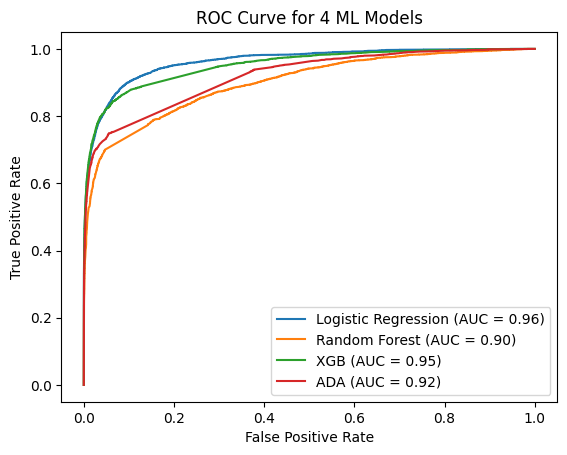

In [ ]:
y_probs={
    'Logistic Regression': prob_lg,
    'Random Forest': prob_rf,
    'XGB': prob_xgb,
    'ADA': prob_ada,
}
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 4 ML Models')
plt.legend()
plt.show()

## **DEEP LEARNING**

Since the BERT model is too heavy due to its numerous parameters, it has been chosen to use the **electra_small** model.

It is a smaller variant of the Electra model, which means it has fewer parameters and is more computationally efficient compared to its larger counterparts


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df["comment_text"], df['Toxicity'], test_size=0.2, random_state=42)

**model_name**: This variable contains a URL pointing to the Electra Small model on TensorFlow Hub. Electra is a pre-trained language model known for its computational efficiency and good performance in natural language processing tasks.

**preproces_name**: This variable contains a URL pointing to the preprocessing module for the BERT model on TensorFlow Hub. In this specific case, the preprocessing module is designed for the English-language BERT model.

In [ ]:
model_name='https://tfhub.dev/google/electra_small/2'
preproces_name='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

- **text_input**: This layer defines the input for the model, which represents the text data to be processed. It takes in a string input of any shape.

- **preprocessing_layer**: This layer utilizes the KerasLayer from TensorFlow Hub to preprocess the text input.

- **encoder_inputs**: This layer takes the preprocessed inputs from the preprocessing_layer and passes them as inputs to theencoder layer. It prepares the text inputs for encoding.

- **encoder**: This layer utilizes the KerasLayer from TensorFlow Hub to load and utilize a encoder model. The encoder processes the inputs and generates contextualized representations of the text.

- **outputs**: This layer captures the outputs generated by the encoder layer. It provides access to various outputs from the model, such as the pooled output, which represents the entire input sequence in a fixed-length representation.

- **net**: This layer applies a dropout regularization technique to the pooled output. Dropout randomly sets a fraction of input units to 0 during training, which helps prevent overfitting and improves generalization.
Then applies a fully connected dense layer with 1 units (neurons). It performs a linear transformation on the input data, preparing it for classification.
Creates a fully connected layer (dense layer) with a single neuron, which is common in a binary classification problem. The 'sigmoid' activation is used to produce an output ranging between 0 and 1, which can be interpreted as the probability of belonging to one of the two classes.

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(preproces_name, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(model_name, trainable=True, name='encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.3)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

**Binary Crossentropy**: is commonly used in binary classification problems. This loss function evaluates the discrepancy between the probability distributions predicted by the model and the actual ones.

**Binary Accuracy**: measures the model's accuracy in predicting binary classes compared to the true labels. Essentially, it represents the fraction of samples correctly classified relative to the total.


In [ ]:
loss = tf.keras.losses.BinaryCrossentropy()
metrics='binary_accuracy'

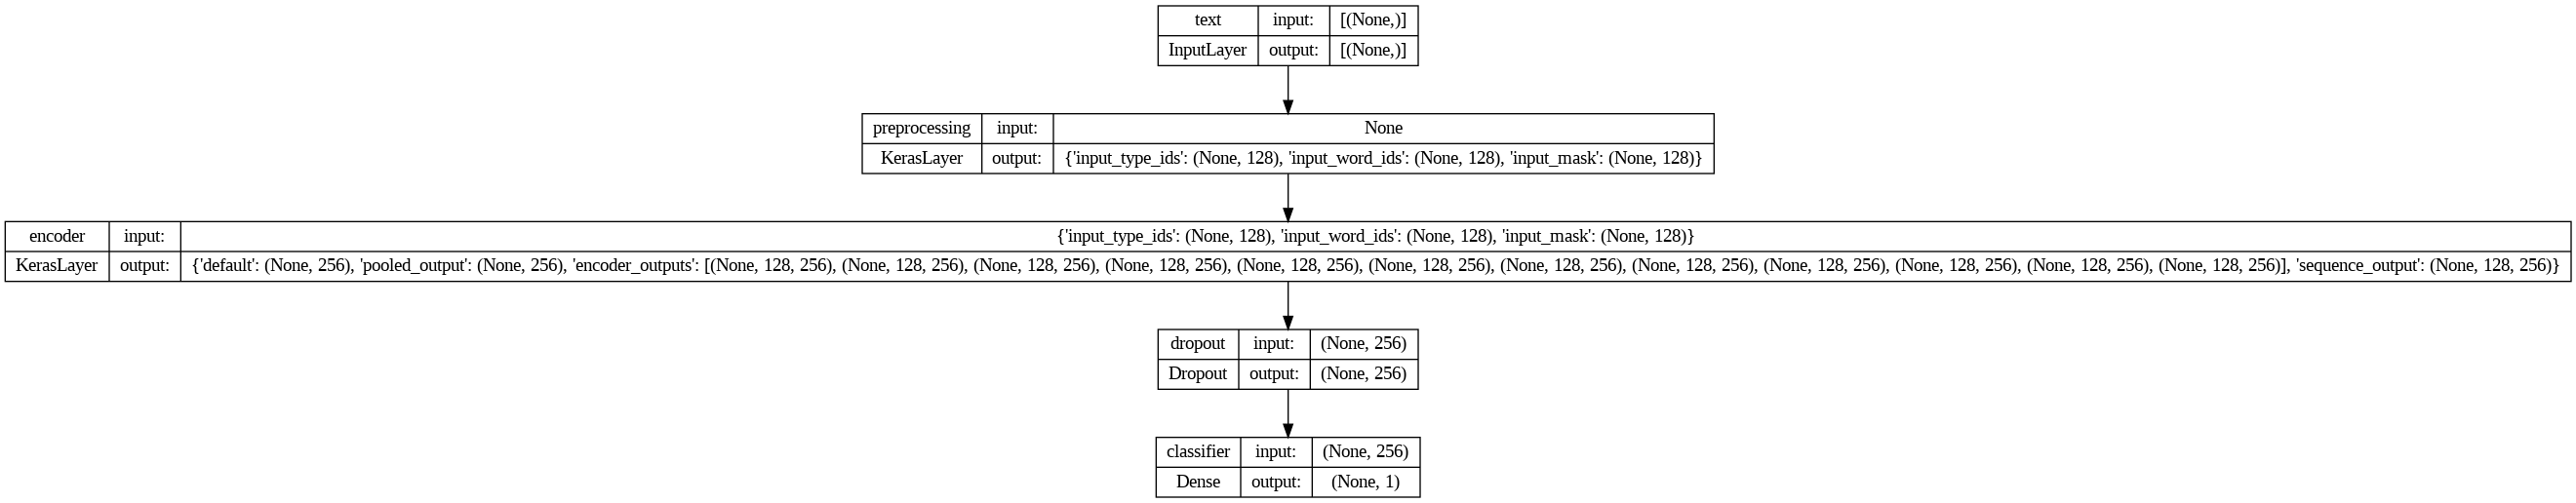

In [ ]:
plot_model(classifier_model, to_file='classifier_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

**ModelCheckpoint**: Saves the model with the best validation performance during training.

**EarlyStopping**: Stops training if the validation binary accuracy does not improve for 4 consecutive epochs. This helps prevent overfitting.

**ReduceLROnPlateau**: Reduces the learning rate by a factor of 0.1 if the validation binary accuracy does not improve for 2 consecutive epochs. This can help the model converge more effectively by adjusting the learning rate dynamically.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("finetune.h5", verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=4),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.1, patience=2, min_lr=1e-8, verbose=1),
]

In [ ]:
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
              loss=loss,
              metrics=metrics)

**You shouldn't execute this script, the weight of the model are provided.**

In [ ]:
# history = classifier_model.fit(X_train,y_train,validation_data=(X_val,y_val),
#                                epochs=20,callbacks=[callbacks])

In [ ]:
classifier_model.load_weights(weight_path)

**You shouldn't execute this script, the predictions of the validation set are provided.**

In [ ]:
# y_pred_prob = classifier_model.predict(X_val)

Script to save in a csv_file the predictions of the validation set

In [ ]:
# df_val_pred = pd.DataFrame(data=y_pred_prob, columns=['Predicted Probability'])
# df_val_pred.to_csv('predicted_probabilities.csv', index=False)

In [ ]:
pred = df_prediction_val.values

As previously, the ROC curve is used as a metric of accuracy.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, pred)
auc_score = auc(fpr, tpr)

A value of 0.98 for the **Area Under the Curve** in a ROC curve is generally indicative of a highly accurate model. AUC measures the area under the ROC curve, representing the ability of a classification model to effectively discriminate between classes.

In this case, a value of 0.98 suggests that the model has very high performance, with high **sensitivity** and **specificity** in classification. The closer the AUC is to 1, the better the model's ability to separate the target classes. Considering that among those previously proposed, it has the highest value, this model will be used for predictions on the test set.

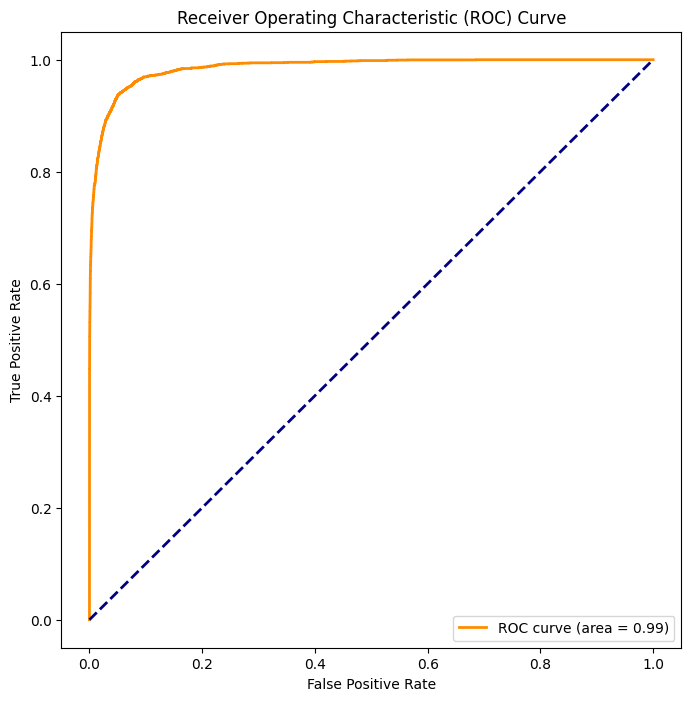

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**You shouldn't execute this script, the predictions of the test set are provided.**

In [ ]:
# predictions = classifier_model.predict(df_test['comment_text'])

In [ ]:
# df_test_pred = pd.DataFrame(data=predictions, columns=['Predicted Probability'])
# df_test_pred.to_csv('predicted_probabilities_test.csv', index=False)

In [ ]:
pred_test = df_prediction_test.values

In [ ]:
test=[]
for pred in pred_test:
  if pred <=0.5:
    test.append(0)
  else:
    test.append(1)

df_test['prediction']=test
df_test

id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        prediction  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
153159           1  
153160           0  
153161           0  
153162           0  
153163           1  

[153164 rows x 3 columns]

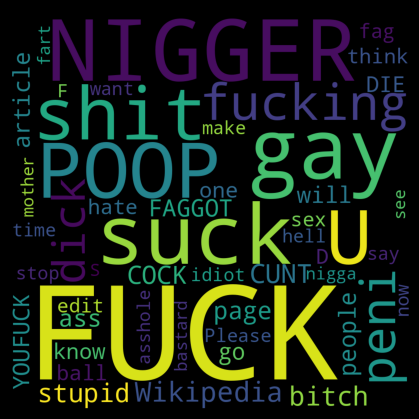

In [ ]:
bad_words = df_test['comment_text'][df_test['prediction'] == 1]
spam_cloud = WordCloud(width=600, height=400, background_color='black', max_words=50, collocations=False,mask=image).generate(' '.join(bad_words))
plt.figure(figsize=(6,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Clustering**

## **Preprocessing**

In [ ]:
csv_path = '/content/drive/MyDrive/TM&S_Cervini_Sabino/train.csv'
df = pd.read_csv(csv_path)

In [ ]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['text_preprocessed'] = df['comment_text'].apply(remove_urls)
df['text_preprocessed'] = df['text_preprocessed'].str.replace('\n',' ')
df["text_preprocessed"] = df["text_preprocessed"].str.lower()
df["text_preprocessed"] = df["text_preprocessed"].str.strip()
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: word_tokenize(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: remove_stopwords(x))
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_special_characters(x))
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: remove_long(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: lemmaSentence(x))
df["text_preprocessed"] = df["text_preprocessed"].apply(lambda x: remove_empty_tokens(x))

In [ ]:
print(df["text_preprocessed"])

0         [explanation, edits, made, username, hardcore,...
1         [daww, match, background, colour, m, seemingly...
2         [hey, man, m, really, trying, edit, war, s, gu...
3         [ca, nt, make, real, suggestion, improvement, ...
4                    [sir, hero, chance, remember, page, s]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, there, actual, article, prostit...
159569    [look, like, actually, put, speedy, first, ver...
159570    [really, nt, think, understand, came, idea, ba...
Name: text_preprocessed, Length: 159571, dtype: object


In [ ]:
csv_path_test = '/content/drive/MyDrive/TM&S_Cervini_Sabino/test.csv'
df_test = pd.read_csv(csv_path_test)

In [ ]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df_test['text_preprocessed'] = df_test['comment_text'].apply(remove_urls)
df_test['text_preprocessed'] = df_test['text_preprocessed'].str.replace('\n',' ')
df_test["text_preprocessed"] = df_test["text_preprocessed"].str.lower()
df_test["text_preprocessed"] = df_test["text_preprocessed"].str.strip()
df_test["text_preprocessed"] = df_test["text_preprocessed"].apply(lambda x: word_tokenize(x))
df_test["text_preprocessed"] = df_test["text_preprocessed"].apply(lambda x: remove_stopwords(x))
df_test['text_preprocessed'] = df_test['text_preprocessed'].apply(lambda x: remove_special_characters(x))
df_test['text_preprocessed'] = df_test['text_preprocessed'].apply(lambda x: remove_long(x))
df_test["text_preprocessed"] = df_test["text_preprocessed"].apply(lambda x: lemmaSentence(x))
df_test["text_preprocessed"] = df_test["text_preprocessed"].apply(lambda x: remove_empty_tokens(x))

In [ ]:
print(df_test["text_preprocessed"])

0         [yo, bitch, ja, rule, succesful, ll, ever, wha...
1                                   [rfc, title, fine, imo]
2                           [source, zawe, ashton, lapland]
3         [look, back, source, information, updated, cor...
4                          [nt, anonymously, edit, article]
                                ...                        
153159        [totally, agree, stuff, nothing, toolongcrap]
153160    [throw, field, home, plate, get, faster, throw...
153161    [okinotorishima, category, see, change, agree,...
153162    [one, founding, nation, eu, germany, law, retu...
153163    [stop, already, bullshit, welcome, m, fool, th...
Name: text_preprocessed, Length: 153164, dtype: object


## **Word2Vec and vectorization**

In [ ]:
SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

In [ ]:
# needed for vectorization
docs = df['comment_text'].values
tokenized_docs = df['text_preprocessed'].values

docs_test = df_test['comment_text'].values
tokenized_docs_test = df_test['text_preprocessed'].values

In [ ]:
# model creation
model = Word2Vec(sentences=tokenized_docs, vector_size=300, workers=1, seed=SEED)

In [ ]:
# vocabulary size
len(model.wv)

39882

In [ ]:
# example of semantics similarity
model.wv.most_similar("lie")

[('truth', 0.6844265460968018),
 ('falsehood', 0.6611197590827942),
 ('lying', 0.6579943299293518),
 ('misinformation', 0.6444558501243591),
 ('slander', 0.6429821252822876),
 ('propaganda', 0.6403506994247437),
 ('liar', 0.6392351388931274),
 ('twisting', 0.6360204815864563),
 ('outright', 0.6015152335166931),
 ('propagandist', 0.5924733877182007)]

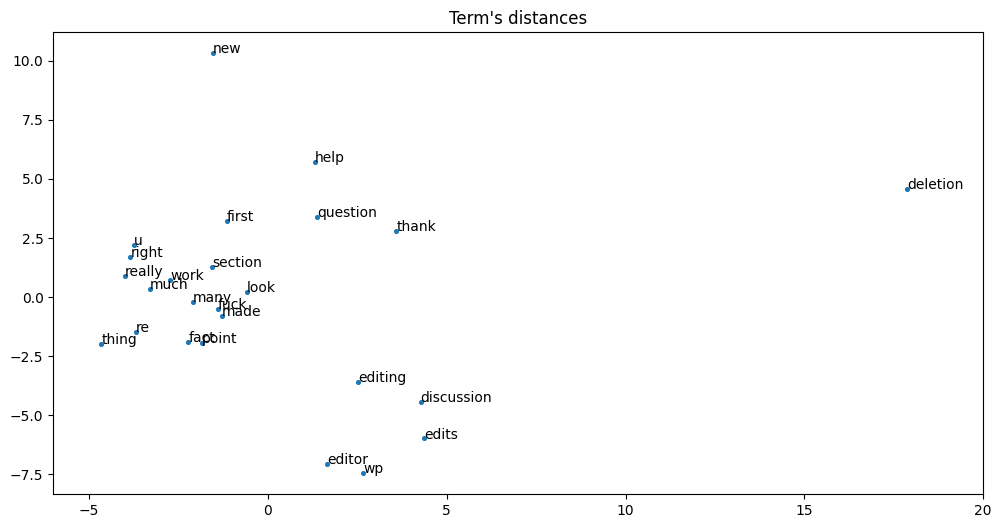

In [ ]:
vocab = list(model.wv.key_to_index)[40:65] # get words
X = model.wv[vocab] # get their representation: 100 features each
pca = PCA(n_components=2) # dimensionality reduction for the plot
result = pca.fit_transform(X)
df_plot = pd.DataFrame(result, index=vocab, columns=['x', 'y']) # create df for plot
# create a scatter plot of the projection
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_plot['x'], df_plot['y'], s = 7)
for word, pos in df_plot.iterrows():
    ax.annotate(word, pos, fontsize=10)
ax.set_title('Term\'s distances')
ax.set_xlim(-6,20)
plt.show()

In [ ]:
# This code will get all the word vectors of each document and average them to generate a vector per each document.
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
vectorized_docs = vectorize(tokenized_docs, model=model)
vectorized_docs_test = vectorize(tokenized_docs_test, model=model)

In [ ]:
print(f'Num. of vectors: {len(vectorized_docs)}\nVectors length: {len(vectorized_docs[0])}')
print(f'Vector representazion example: {vectorized_docs[0]}')

Num. of vectors: 159571
Vectors length: 300
Vector representazion example: [ 2.07969055e-01 -3.24514747e-01  2.34780297e-01 -2.81442106e-01
  5.39404340e-02  1.31659731e-01  8.89732912e-02  3.07013214e-01
  1.26819313e-01  5.41584846e-03  2.45895833e-01  6.63648769e-02
  1.31445497e-01 -4.44517396e-02 -5.47779918e-01 -5.27542293e-01
 -1.59838781e-01  4.41035032e-02  2.50672042e-01 -1.17211036e-01
 -1.62123263e-01 -1.65576875e-01  1.51930407e-01  1.73135757e-01
  1.02673903e-01 -2.39340305e-01 -2.13093311e-01 -2.88297147e-01
  2.93286294e-01  2.39939108e-01 -3.31586421e-01 -4.45079476e-01
  3.01268548e-01  1.88707829e-01  5.63476145e-01 -2.80869752e-01
  5.06295264e-01  1.89469203e-01 -1.68686241e-01  2.78039753e-01
 -4.76561964e-01  4.81678806e-02  2.87204444e-01 -2.07133949e-01
 -1.07289478e-01 -6.97003976e-02 -2.71072090e-01 -1.86917081e-01
  3.63854408e-01  5.84260285e-01 -2.99250633e-01  4.74917203e-01
 -7.62358010e-02 -1.40568614e-01 -4.25648689e-02 -1.53887019e-01
  4.44618732e-0

## **K-means**

In [ ]:
best_num_cluster = 2

In [ ]:
# training
km = KMeans(n_clusters = best_num_cluster, random_state=1).fit(vectorized_docs)
#predict
y =  km.fit_predict(vectorized_docs_test)

print(f"For n_clusters = {best_num_cluster}")
print(f"Silhouette coefficient: {silhouette_score(vectorized_docs_test, y):0.3f}")

sample_silhouette_values = silhouette_samples(vectorized_docs_test, y)
print(f"Clusters Sizes:")
silhouette_values = []
for i in range(best_num_cluster):
    cluster_silhouette_values = sample_silhouette_values[y == i]
    silhouette_values.append(
        (
            i,
            cluster_silhouette_values.shape[0]
        )
    )
silhouette_values = sorted(
    silhouette_values, key=lambda tup: tup[1], reverse=True
)
for s in silhouette_values:
    print(
        f"    Cluster {s[0]}: {s[1]}"
    )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2
Silhouette coefficient: 0.118
Clusters Sizes:
    Cluster 1: 98436
    Cluster 0: 54728


In [ ]:
clustering = km
cluster_labels = y

In [ ]:
df_clusters = pd.DataFrame({
    "text": docs_test,
    "tokens": [" ".join(text) for text in tokenized_docs_test],
    "cluster": cluster_labels
})

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(best_num_cluster):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: brag fatass confront ure mokele 
Cluster 1: article anyway necessary particular otherwise 


In [ ]:
print("Most representative documents per cluster (based on centroids):")
for i in range(best_num_cluster):
    print(f"\nCluster {i}:")
    most_representative_docs = np.argsort(
        np.linalg.norm(vectorized_docs_test - clustering.cluster_centers_[i], axis=1)
    )
    for d in most_representative_docs[:3]:
        print(docs_test[d])
        print("-------------")

Most representative documents per cluster (based on centroids):

Cluster 0:
" 

 == Removed Aristocrats == 

 I removed the following story because of its strong language and content. This is an encyclopedia, meant to be accesable to anyone, including children. If you don't agree with this removal, please discuss it here.   

 Original contents of removed story: 

 :The Aristocrats 
 :(Aka - ""The Sophisticates"") 
 :See link above for its own entry.  However, it is best defined by the 2005 documentary called The Aristocrats, co-produced by  Penn Jillette and Paul Provenza, directed by Provenza, and edited by Emery Emery and Provenza 

 :The following is a version of an Aristocrats joke which best resembles the premise and setup for a shaggy dog story: 
 
 :A family walks into a talent agency. It's a father, mother, son, daughter and dog. The father says to the talent agent, ""We have a really amazing act. You should represent us."" The agent says, ""Sorry, I don't represent family act

In [ ]:
# svd = TruncatedSVD(n_components=2)
# data = svd.fit_transform(vectorized_docs)
# scatter_x = data[:, 0]
# scatter_y = data[:, 1]

In [ ]:
# # 2D plot
# hue_order = [0, 1]
# plt.figure(figsize=(5, 5))
# sns.scatterplot(x = scatter_x, y=scatter_y, hue=df.malignant, s=150, hue_order=hue_order)
# plt.tight_layout()
# plt.grid()
# plt.title('Labels on training datset')
# #plt.axis('off')
# plt.show()

In [ ]:
# svd = TruncatedSVD(n_components=2)
# data = svd.fit_transform(vectorized_docs_test)
# scatter_x = data[:, 0]
# scatter_y = data[:, 1]

In [ ]:
# # 2D plot
# hue_order = [0, 1]
# plt.figure(figsize=(5, 5))
# sns.scatterplot(x = scatter_x, y=scatter_y, hue=y, s=150, hue_order=hue_order)
# plt.tight_layout()
# plt.grid()
# plt.title('Predicted label')
# #plt.axis('off')
# plt.show()

## **C-means**

### **Preprocessing and vectorization**

In [ ]:
detokenizer = Detok()
#text = detokenizer.detokenize(list(df['text_preprocessed']))
not_tok_train = df["text_preprocessed"].apply(lambda x: detokenizer.detokenize(x))
not_tok_test = df_test["text_preprocessed"].apply(lambda x: detokenizer.detokenize(x))

In [ ]:
## Training set

# Generate bag of words object with maximum vocab size of 1000
counter_train = sklearn.feature_extraction.text.CountVectorizer(max_features = 1000)
# Get bag of words model as sparse matrix
bag_of_words_train = counter_train.fit_transform(not_tok_train.values)
# Generate tf-idf object with maximum vocab size of 1000
tf_counter_train = sklearn.feature_extraction.text.TfidfVectorizer(max_features = 1000)
# Get tf-idf matrix as sparse matrix
tfidf_train = tf_counter_train.fit_transform(not_tok_train.values).toarray()

svd = TruncatedSVD(n_components=2)
svd.fit_transform(tfidf_train)
reduced_tfidf_train = svd.fit_transform(tfidf_train)
reduced_tfidf_train = normalize(reduced_tfidf_train, axis=0)

In [ ]:
## Test set

# Generate bag of words object with maximum vocab size of 1000
counter_test = sklearn.feature_extraction.text.CountVectorizer(max_features = 1000)
# Get bag of words model as sparse matrix
bag_of_words_test = counter_test.fit_transform(not_tok_test.values)
# Generate tf-idf object with maximum vocab size of 1000
tf_counter_test = sklearn.feature_extraction.text.TfidfVectorizer(max_features = 1000)
# Get tf-idf matrix as sparse matrix
tfidf_test = tf_counter_test.fit_transform(not_tok_test.values).toarray()
reduced_tfidf_test = svd.fit_transform(tfidf_test)
reduced_tfidf_test = normalize(tfidf_test, axis=0)

svd = TruncatedSVD(n_components=2)
svd.fit_transform(tfidf_test)
reduced_tfidf_test = svd.fit_transform(tfidf_test)
reduced_tfidf_test = normalize(reduced_tfidf_test, axis=0)

In [ ]:
# Fuzzy c-means clustering
n_clusters = 2
fuzziness_parameter = 2.0
# fit the model
cntr, u_orig, cluster_centers, _, _, _, _, = fuzz.cmeans(reduced_tfidf_train.T, n_clusters, fuzziness_parameter, error=0.005, maxiter=1000)

# Assign documents to clusters
clusters = np.argmax(u_orig, axis=0)

In [ ]:
# make predictions
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    reduced_tfidf_test.T, cntr, 2, error=0.005, maxiter=1000)

In [ ]:
fpc_score_test = fpc  # Fuzzy Partition Coefficient on test
print(f"Fuzzy Partition Coefficient (FPC) on test: {fpc_score_test}")

Fuzzy Partition Coefficient (FPC) on test: 0.8138578899624669


In [ ]:
importance_scores = u.max(axis=0)

In [ ]:
cluster_assignments = np.argmax(u, axis=0)

In [ ]:
df_clusters_cmeans = pd.DataFrame({
    "text": docs_test,
    "tokens": [" ".join(text) for text in tokenized_docs_test],
    "cluster": cluster_assignments,
    "importance": importance_scores
})

In [ ]:
temp = df_clusters_cmeans.groupby('cluster').apply(lambda group: group.nlargest(5, 'importance')).reset_index(drop=True)

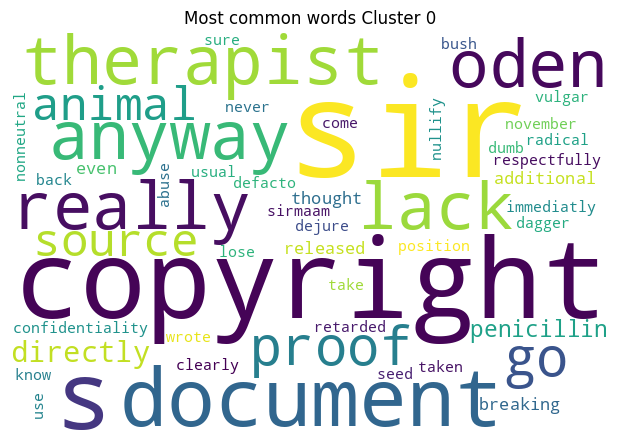

In [ ]:
spam_cloud = WordCloud(width=600, height=400, background_color='white', max_words=50, collocations=False).generate(' '.join(temp.query('cluster == 0').tokens))
plt.figure(figsize=(6,4))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most common words Cluster 0')
plt.show()

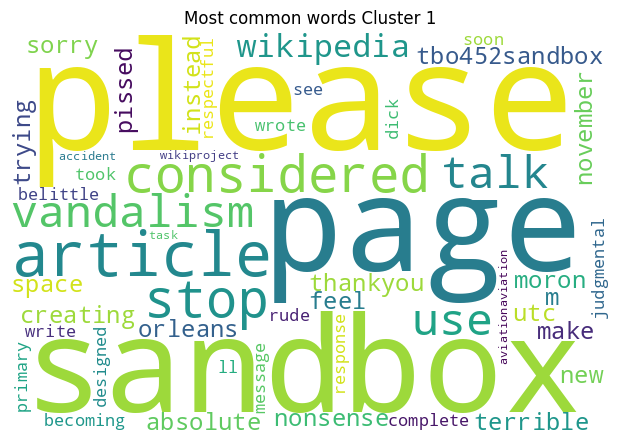

In [ ]:
spam_cloud = WordCloud(width=600, height=400, background_color='white', max_words=50, collocations=False).generate(' '.join(temp.query('cluster == 1').tokens))
plt.figure(figsize=(6,4))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most common words Cluster 1')
plt.show()

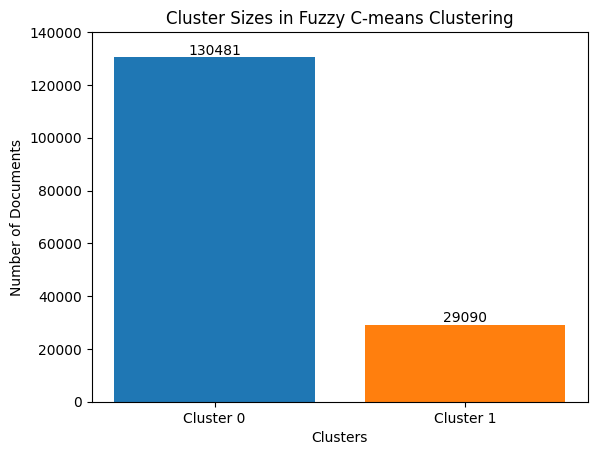

In [ ]:
cluster_counts = np.bincount(clusters)
bar_colors = ['tab:blue', 'tab:orange']
# Plot the cluster sizes
plt.bar(range(n_clusters), cluster_counts, tick_label=[f'Cluster {i}' for i in range(n_clusters)], color=bar_colors)
plt.xlabel('Clusters')
plt.ylabel('Number of Documents')
plt.title('Cluster Sizes in Fuzzy C-means Clustering')
for i in range(len(cluster_counts)):
        plt.text(i, cluster_counts[i]+1000, cluster_counts[i], ha = 'center')
plt.ylim(0, 140000)
plt.show()

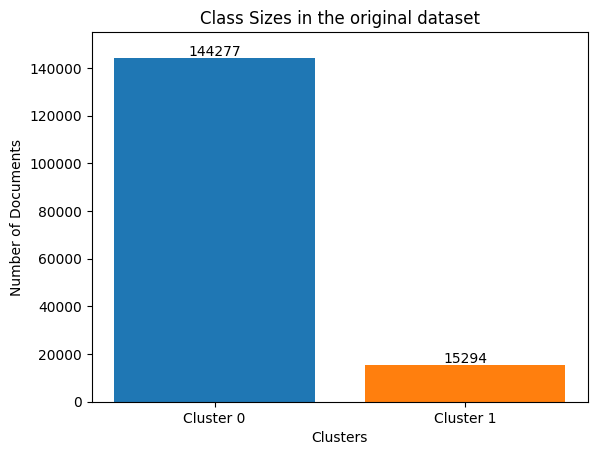

In [ ]:
# Plot the cluster sizes
plt.bar(df.malignant.value_counts().index, df.malignant.value_counts().values, tick_label=[f'Cluster {i}' for i in range(n_clusters)], color=bar_colors)
plt.xlabel('Clusters')
plt.ylabel('Number of Documents')
for i in range(0,2):
        plt.text(i, df.malignant.value_counts().values[i]+1000, df.malignant.value_counts().values[i], ha = 'center')
plt.title('Class Sizes in the original dataset')
plt.ylim(0, 155000)
plt.show()

## **K-means and C-means scatter plots**

Here we use **t-SNE** because unlike linear methods such as Principal Component Analysis (PCA), t-SNE is non-linear. It can capture complex relationships and non-linear structures in the data, making it well-suited for visualizing intricate patterns that may be lost in linear projections.\
The transformation takes a while, so once computed, they were saved to be loaded later.

**You shouldn't execute this script, the tranformations of the training set are provided.**

In [ ]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(tfidf_train)

**You shouldn't execute this script, the tranformations of the test set are provided too.**

In [ ]:
# tsne_results_test = tsne.fit_transform(tfidf_test)

In [ ]:
# df_tsne_results_test = pd.DataFrame(tsne_results_test)

In [ ]:
# df_tsne_results_train = pd.DataFrame(tsne_results)

In [ ]:
# df_tsne_results_test.to_csv('df_tsne_results_test.csv', index=False)

In [ ]:
# df_tsne_results_train.to_csv('df_tsne_results_train.csv', index=False)

In [ ]:
# make predictions on training set --> only for plot
u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    reduced_tfidf_train.T, cntr, 2, error=0.005, maxiter=1000)

In [ ]:
cluster_assignments_train = np.argmax(u_train, axis=0)

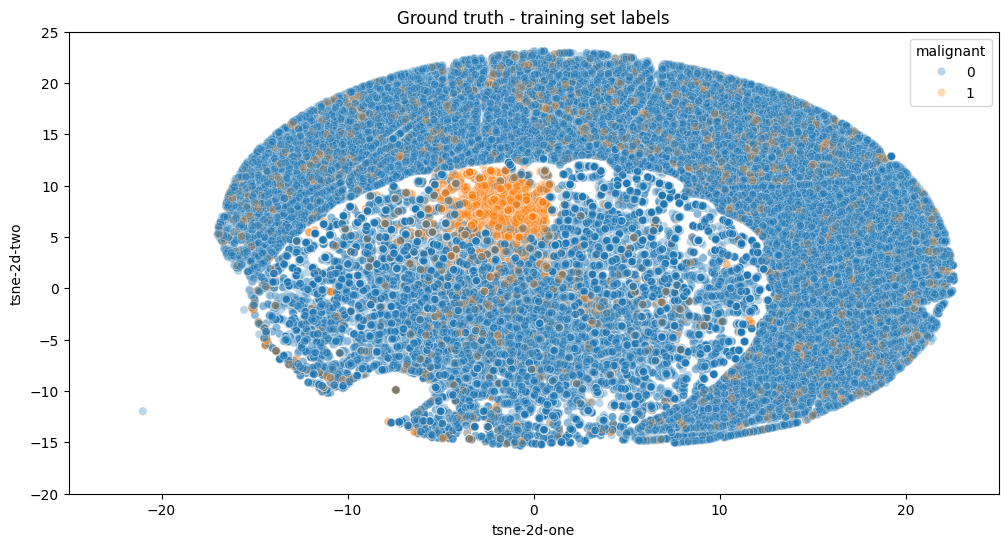

In [ ]:
df['tsne-2d-one'] = df_tsne_results_train.iloc[:,0]
df['tsne-2d-two'] = df_tsne_results_train.iloc[:,1]

plt.figure(figsize=(12,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='malignant',
    #palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.title('Ground truth - training set labels')
plt.xlim(-25,25)
plt.ylim(-20,25)
plt.show()

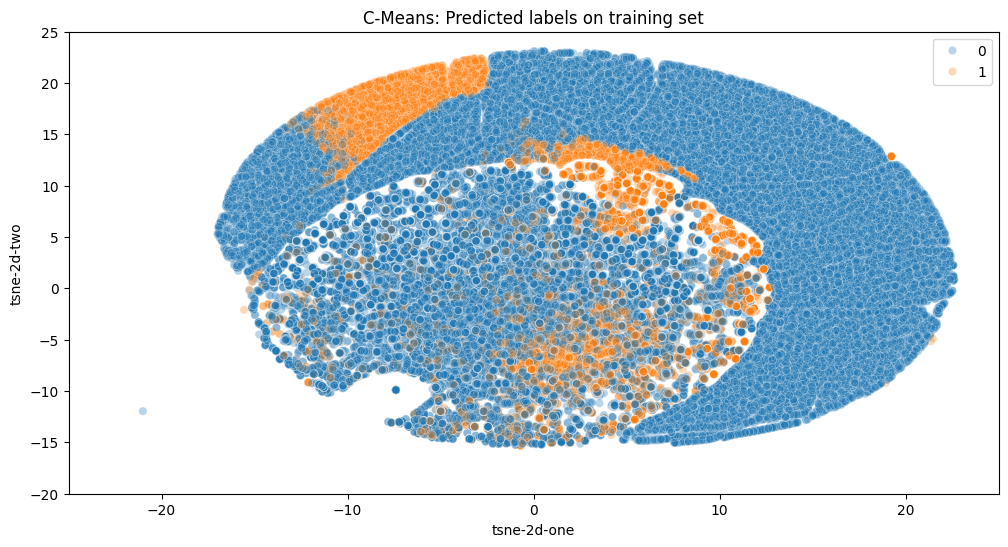

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=cluster_assignments_train,
    #palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.title('C-Means: Predicted labels on training set')
plt.xlim(-25,25)
plt.ylim(-20,25)
plt.show()

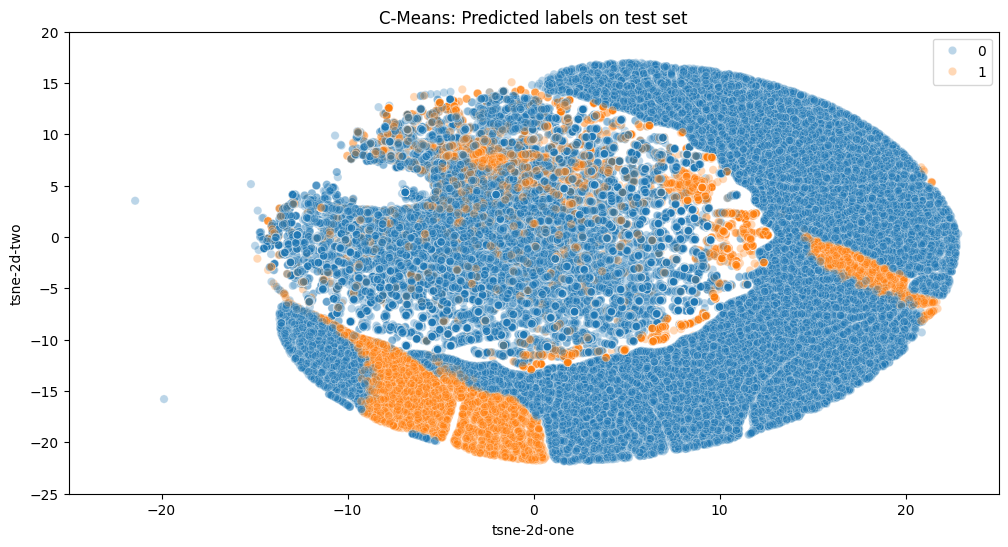

In [ ]:
df_test['tsne-2d-one'] = df_tsne_results_test.iloc[:,0]
df_test['tsne-2d-two'] = df_tsne_results_test.iloc[:,1]

plt.figure(figsize=(12,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=cluster_assignments,
    #palette=sns.color_palette("hls", 10),
    data=df_test,
    legend="full",
    alpha=0.3
)
plt.title('C-Means: Predicted labels on test set')
plt.xlim(-25,25)
plt.ylim(-25,20)
plt.show()

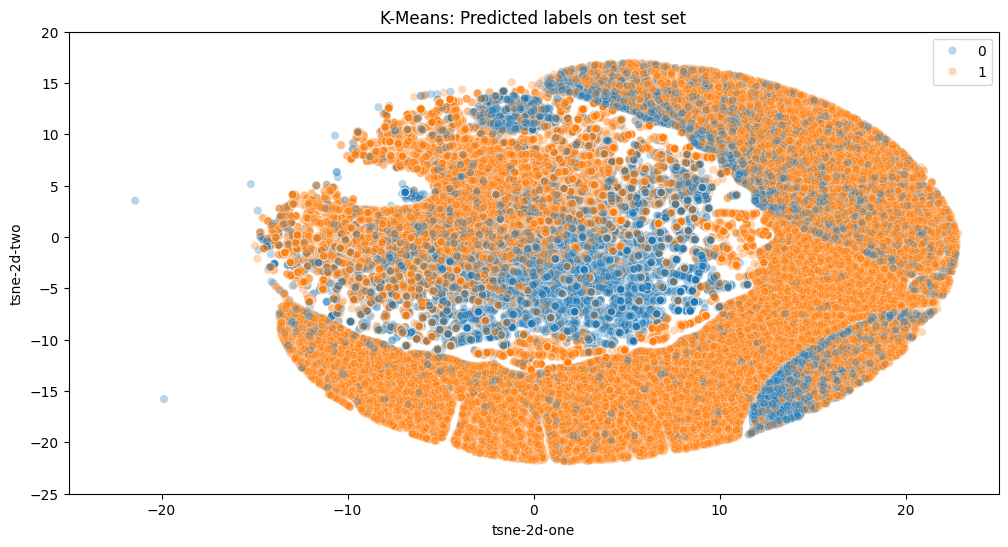

In [ ]:
## k-means
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    #palette=sns.color_palette("hls", 10),
    data=df_test,
    legend="full",
    alpha=0.3
)
plt.title('K-Means: Predicted labels on test set')
plt.xlim(-25,25)
plt.ylim(-25,20)
plt.show()

In [ ]:
y_train =  km.fit_predict(vectorized_docs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


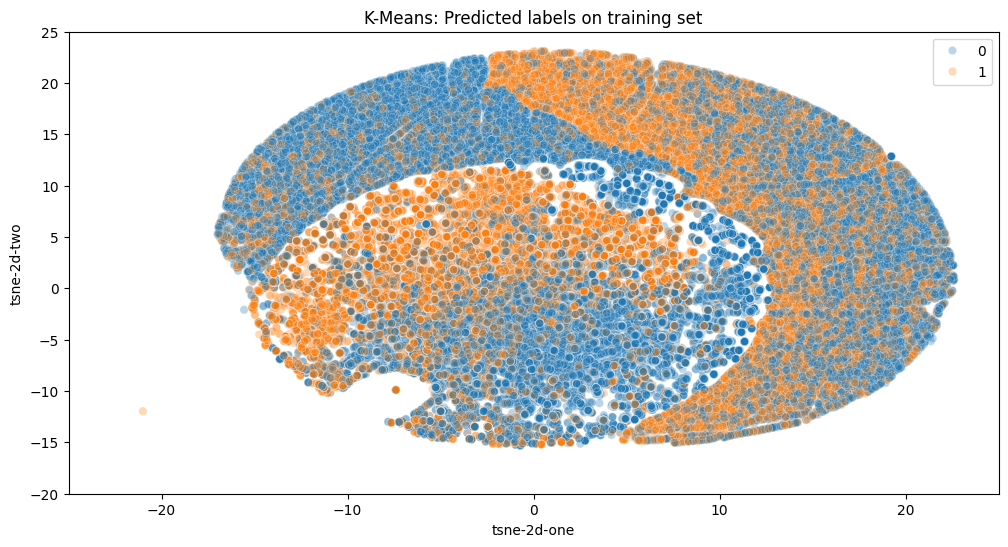

In [ ]:
## k-means
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_train,
    #palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.title('K-Means: Predicted labels on training set')
plt.xlim(-25,25)
plt.ylim(-20,25)
plt.show()